# In this notebook we are training and evaluating the base model of our project which is a logistic regression on two features related to heart beats, bpm (beats per minute) and sdnn  (standard deviation of the NN (R-R) intervals)

Import libraries

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    classification_report,
    accuracy_score,
    confusion_matrix,
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from utils import *

Retrieve the data sets, separate features and labels

In [5]:
train_data = pd.read_csv('base_model_train_set.csv')
test_data = pd.read_csv('base_model_test_set.csv')



X_train = train_data.drop(columns='apnea', axis=1) 
y_train = train_data.apnea.values

X_test = test_data.drop(columns='apnea', axis=1) 
y_test = test_data.apnea.values


Define the pipeline and fit the model

In [6]:
scaler = StandardScaler()
lr = LogisticRegression()
model1 = Pipeline([('standardize', scaler),
                    ('log_reg', lr)])

model1.fit(X_train, y_train)

Pipeline(steps=[('standardize', StandardScaler()),
                ('log_reg', LogisticRegression())])

Make predictions and check different metrics for train set

In [7]:
y_train_hat = model1.predict(X_train)
y_train_hat_probs = model1.predict_proba(X_train)[:,1]

train_accuracy = accuracy_score(y_train, y_train_hat)*100
train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_train, y_train_hat))

print('Training AUC: %.4f %%' % train_auc_roc)

print('Training accuracy: %.4f %%' % train_accuracy)

Confusion matrix:
 [[7289 1040]
 [4572  743]]
Training AUC: 62.4751 %
Training accuracy: 58.8684 %


Make predictions and check different metrics for test set

In [8]:
y_test_hat = model1.predict(X_test)
y_test_hat_probs = model1.predict_proba(X_test)[:, 1]


test_accuracy = accuracy_score(y_test, y_test_hat) * 100
test_auc_roc = roc_auc_score(y_test, y_test_hat_probs) * 100

tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_hat).ravel()


sensitivity = tp_test / (tp_test + fn_test)
specificity = tn_test / (tn_test + fp_test)
precision = tp_test / (tp_test + fp_test)
recall = tp_test / (tp_test + fn_test)
F1 = (2 * precision * recall) / (precision + recall)

print("Confusion matrix:\n", confusion_matrix(y_test, y_test_hat))

print("Testing AUC: %.4f %%" % test_auc_roc)

print("Testing accuracy: %.4f %%" % test_accuracy)

print("Testing sensitivity: %.4f %%" % sensitivity)

print("Testing specificity: %.4f %%" % specificity)

print("Testing F1: %.4f %%" % F1)


# sensitivity + specificity - 1
youden = (tp_test / (tp_test + fn_test)) + (tn_test / (tn_test + fp_test)) - 1
print("Youden index: ", +youden)

Confusion matrix:
 [[2026   65]
 [1110   65]]
Testing AUC: 60.3229 %
Testing accuracy: 64.0233 %
Testing sensitivity: 0.0553 %
Testing specificity: 0.9689 %
Testing F1: 0.0996 %
Youden index:  0.02423354396247346


Visualize the confusion matrix for test set predictions

[Text(0, 0.5, 'apnea'), Text(0, 1.5, 'normal')]

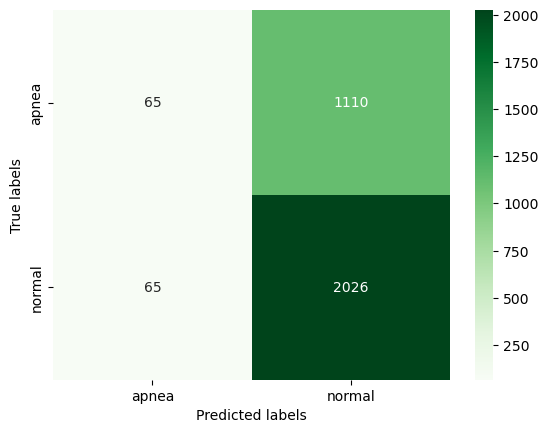

In [9]:
# Plot confusion matrix

cm = [[tp_test, fn_test], [fp_test, tn_test]]

ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt="g", cmap="Greens", ax=ax)
# annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
# ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(["apnea", "normal"])
ax.yaxis.set_ticklabels(["apnea", "normal"])